In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math

# Collections
from collections import Counter

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# load data
breast_cancer=datasets.load_breast_cancer()
print(breast_cancer.DESCR)

# this dataset has 30 features 
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names )


# extract the data as numpy arrays of features, X, and target, y
X = df_breast_cancer
y = breast_cancer.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
X=breast_cancer.data
Y=breast_cancer.target
feature_names = np.array(breast_cancer.feature_names)
target_names = breast_cancer.target_names

"""
Creating plotting function in which given x and y is transformed to dataframe
and after that seaborn module is used to plot scatter and histogram
"""
def myplotgrid(x,y,col):
    df = pd.DataFrame(x, columns=col)
    df['label'] = y
    sns.pairplot(df, hue='label')
    plt.show()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


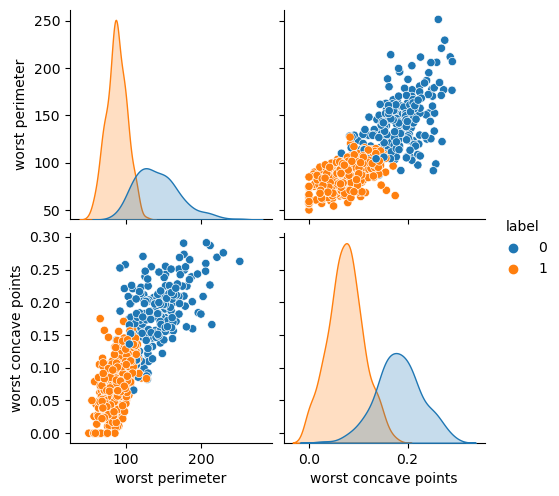

In [3]:
#****************************************** #
# Plot using function (NO NOISE added)#
#****************************************** #

#Use plotting function for any two features
#that is, parameterise, to plot different feature combinations

print(feature_names)

# We can index the features using variables, e.g.
a = 22 #substitute different values here and play around with the feature combinations
b = 27 ##substitute different values here and play around with the feature combinations

# (remember that indices in python start at 0!)

# plt.scatter(X[:, a], X[:, b], c=Y, cmap=plt.cm.Paired)
# plt.xlabel(feature_names[a])
# plt.ylabel(feature_names[b])
myplotgrid(X[:, [a,b]], Y, col=feature_names[[a,b]])

In [5]:
# mykNN code
# There are only 3 steps for kNN:

# 1. Function for calculating Euclidean distance (known as L2 vector norm) between two vectors
def euclidean_distance(row1,row2) -> float:
    distance = 0.0
    
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2

    return round(math.sqrt(distance), 4)

# 1. Function for calculating Manhattan distance (known as L1 vector norm) between two vectors 
def manhattan(row1,row2): 
    distance = 0.0
    for i in range(len(row1)-1):
        distance += abs(row1[i] - row2[i])
    return distance

# 1. Function to calculate Chebyshev distance (known as the L∞ metric) between two vectors
def chebyshev_distance(array1, array2) -> float:
    """
    Function that takes in 2 vectors and calculates the Chebyshev Distance between them.
    Chebyshev distance is the absolute magnitude of the maximum distance between 2 points.
    Input parameters: array1, array2 -> 2 vectors.
    Output: Returns a floating point number representing the Chebyshev Distance between array1 and array2.
    """
    distance = 0.0
    
    for i in range(len(array1)):
        
        # Calculate absolute value of the distance between elements of the vectors
        dist = abs(array1[i] - array2[i])

        # Updating the maximum distance value
        if dist > distance:
            distance = dist
        
    return float(distance)

# Creating a function mapping
function_mappings = {'euclidean': euclidean_distance, 'manhattan' : manhattan, 'chebyshev' : chebyshev_distance}

# 2. Locate the most similar neighbors using our manual function
def mykNN(X,y,X_, num_neighbors,distance=euclidean_distance):
    distances = list()
    train = np.append(X,y.reshape(-1,1),axis=1)
    test_row = X_
    for train_row in train:
        dist = distance(test_row,train_row)
        distances.append((train_row, dist))

    #for each point distance is measured, a list of these distances is created. our requirement is the shortest distance
    #as we need to assign data to the neighbours.  for this purpose, lambda function takes distances list and sorts list in ascending order
    #only top distance assigned to each neighbour i.e. 1st kNN gets 1st distance from list, 2nd kNN gets 2nd distance from list...and so on
    distances.sort(key=lambda tup: tup[1])
    
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [6]:
predict = mykNN(X,y,X[100],3,manhattan)
print('Actual:', y[100])
print('Predicted:', predict)

Actual: 0
Predicted: 0.0


In [7]:
np.random.seed(myseed) #random selections will be consistent every run, so results stay the same
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#split to train and test
#80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. Refer to reference 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#define knn classifier, with 10 neighbors and use the euclidian distance
knn=KNeighborsClassifier(n_neighbors=10, metric='euclidean')

#define training and testing data, fit the classifier
knn.fit(X_train,y_train)

#predict values for test data based on training data
y_pred=knn.predict(X_test)

# predicting with mykNN
myknn_pred = list()
for i in range(len(X_test)):
    myknn_pred.append(int(mykNN(X_train,y_train,X_test[i], 10)))
    
#print values
print("True Values", y_test) # true values
print("\nSklearn's KNN Classifier: ", y_pred) 
print("\nOur KNN Classifier: ", myknn_pred) 
print(len(y_pred) == len(myknn_pred))
print(len(y_pred))

True Values [1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0
 0 1 0]

Sklearn's KNN Classifier:  [1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0
 0 1 1]

Our KNN Classifier:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
True
114


In [8]:
# Calculating accuracies of both classifiers
from sklearn.metrics import accuracy_score as acc
print("Accuracy of Sklearn KNN Classifier: ", acc(y_test, y_pred))
print("Accuracy of Our KNN Classifier: ", acc(y_test, myknn_pred))

Accuracy of Sklearn KNN Classifier:  0.9298245614035088
Accuracy of Our KNN Classifier:  0.9298245614035088
